# Plotting N vs delta E

In [109]:
import sys
sys.path.append("../")

from __init__ import *
from data_tools import *
from testing import *

In [111]:
frame = pd.read_csv("../data/simulations_truth/harmonic_scatters.csv")

frame.head()

energies = []
total_interactions = 0
interaction_times = []
total_times = []

for i in range(len(frame)-1):
    if frame["File_name"][i] == frame["File_name"][i+1]:
        energies.append(frame["Energy [eV]"][i] - frame["Energy [eV]"][i+1])
        total_interactions += 1
        interaction_times.append(frame["Time [seconds]"][i+1] - frame["Time [seconds]"][i])
    
    else:
        total_times.append(frame["Time [seconds]"][i])
        
energies = np.array(energies)

print("Median energy loss per interaction: ", np.median(energies), "eV")
print("Mean energy loss per interaction: ", np.mean(energies), "eV")
print("Minimum energy loss: ", np.min(energies), "eV")
print("Maximum energy loss: ", np.max(energies), "eV")
print("Total interactions: ", total_interactions)
print("Average number of interactions: ", total_interactions/frame["File_name"].nunique())


print("Timing information")
print("Average event time: ", np.mean(total_times), "seconds")
print("Median event time: ", np.median(total_times), "seconds")
print("Average interaction time: ", np.mean(interaction_times), "seconds")
print("Median interaction time: ", np.median(interaction_times), "seconds")


Median energy loss per interaction:  17.222022596239185 eV
Mean energy loss per interaction:  23.326510656733944 eV
Minimum energy loss:  0.0034800643734342884 eV
Maximum energy loss:  3032.6311099906634 eV
Total interactions:  6788
Average number of interactions:  4.700831024930748
Timing information
Average event time:  0.00040781270945359366 seconds
Median event time:  0.0004192230334108 seconds
Average interaction time:  8.673492138571837e-05 seconds
Median interaction time:  6.0976569644194235e-05 seconds


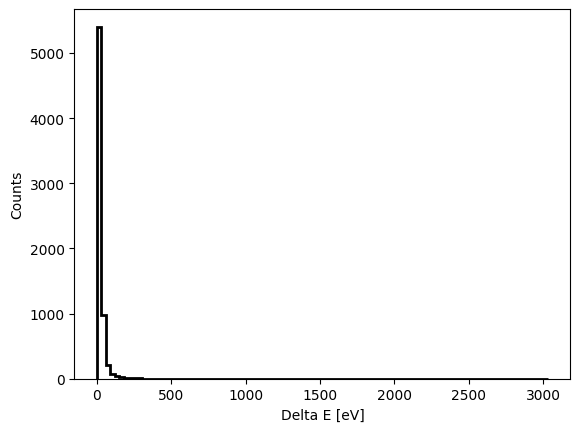

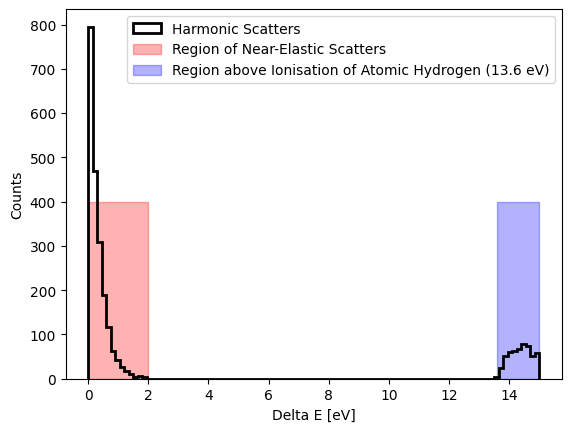

In [112]:
plt.hist(energies, bins=100, histtype="step", color="black", linewidth=2, label="Harmonic Scatters")
plt.xlabel("Delta E [eV]")
plt.ylabel("Counts");
plt.show();

plt.hist(energies, bins=100, range=(0, 15), histtype="step", color="black", linewidth=2, label="Harmonic Scatters")
plt.xlabel("Delta E [eV]")
plt.ylabel("Counts");
plt.fill_betweenx([0, 400], 0, 2, color="red", alpha=0.3, label='Region of Near-Elastic Scatters')
plt.fill_betweenx([0, 400], 13.6, 15, color="blue", alpha=0.3, label='Region above Ionisation of Atomic Hydrogen (13.6 eV)')
plt.legend()

plt.show();

In [113]:
frame.head()

,File_name,signal,trap,Axial Frequency [Hertz],B_bkg [Tesla],Gas density [m^-3],LO frequency [Hertz],Pitch angle [degrees],Energy [eV],Cyclotron frequency [Hertz],Downmixed cyclotron frequency [Hertz],Time [seconds],Time step [seconds],i_coil [Amps],r_coil [metres],r_wg [metres],Starting x position [metres],Starting y position [metres],Maxmimum z position [metres],Starting z position [metres]
0,out_25cff5d8-75a0-4642-9f97-ced3421b76a1.h5,signal1,Harmonic,5.064948e+07,0.7034,1.000000e+18,1.865745e+10,88.638416,18396.603756,1.891824e+10,2.607903e+08,0.000000,1.000000e-09,594.912372,108.225359,0.02,-0.000352,-0.002104,0.005695,0.000000
1,out_25cff5d8-75a0-4642-9f97-ced3421b76a1.h5,signal1,Harmonic,4.793978e+07,0.7034,1.000000e+18,1.865745e+10,88.269386,18396.147388,1.892247e+10,2.650153e+08,0.000133,1.000000e-09,594.912372,108.225359,0.02,0.002100,-0.000303,0.007501,-0.003022
2,out_25cff5d8-75a0-4642-9f97-ced3421b76a1.h5,signal1,Harmonic,4.535248e+07,0.7034,1.000000e+18,1.865745e+10,87.987789,18380.532865,1.892661e+10,2.691602e+08,0.000318,1.000000e-09,594.912372,108.225359,0.02,-0.002427,0.000772,0.009039,0.007480
3,out_25cff5d8-75a0-4642-9f97-ced3421b76a1.h5,signal1,Harmonic,4.415565e+07,0.7034,1.000000e+18,1.865745e+10,87.873524,18363.716704,1.892906e+10,2.716054e+08,0.000407,1.000000e-09,594.912372,108.225359,0.02,0.000497,0.001861,0.009715,0.009039
4,out_25cff5d8-75a0-4642-9f97-ced3421b76a1.h5,signal1,Harmonic,4.155484e+07,0.7034,1.000000e+18,1.865745e+10,87.649337,18342.157180,1.893364e+10,2.761854e+08,0.000553,1.000000e-09,594.912372,108.225359,0.02,-0.002578,-0.000414,0.011157,0.009530


Refer to paper https://arxiv.org/pdf/1603.04243 for more details.

In [114]:
frame = pd.read_csv("../data/simulations_truth/bathtub_scatters.csv")

frame.head()

energies_bathtub = []
total_interactions = 0
interaction_times = []
total_times = []

for i in range(len(frame)-1):
    if frame["File_name"][i] == frame["File_name"][i+1]:
        energies_bathtub.append(frame["Energy [eV]"][i] - frame["Energy [eV]"][i+1])
        total_interactions += 1
        interaction_times.append(frame["Time [seconds]"][i+1] - frame["Time [seconds]"][i])
    
    else:
        total_times.append(frame["Time [seconds]"][i])

energies_bathtub = np.array(energies_bathtub)

print("Median energy loss per interaction: ", np.median(energies_bathtub), "eV")
print("Mean energy loss per interaction: ", np.mean(energies_bathtub), "eV")
print("Minimum energy loss: ", np.min(energies_bathtub), "eV")
print("Maximum energy loss: ", np.max(energies_bathtub), "eV")
print("Total interactions: ", total_interactions)
print("Average number of interactions: ", total_interactions/frame["File_name"].nunique())


print("Timing information")
print("Average event time: ", np.mean(total_times), "seconds")
print("Median event time: ", np.median(total_times), "seconds")
print("Average interaction time: ", np.mean(interaction_times), "seconds")
print("Median interaction time: ", np.median(interaction_times), "seconds")


Median energy loss per interaction:  17.08321819561752 eV
Mean energy loss per interaction:  23.160964662804666 eV
Minimum energy loss:  0.0033862366726680193 eV
Maximum energy loss:  1297.1527732589057 eV
Total interactions:  6268
Average number of interactions:  4.515850144092219
Timing information
Average event time:  0.0003968638431411143 seconds
Median event time:  0.0004021128932301 seconds
Average interaction time:  8.792932781083881e-05 seconds
Median interaction time:  6.31740951561e-05 seconds


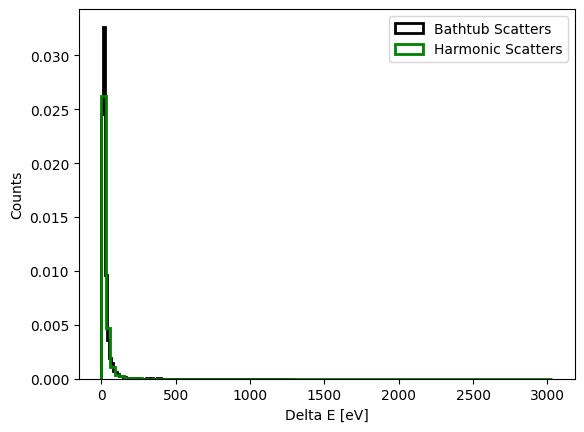

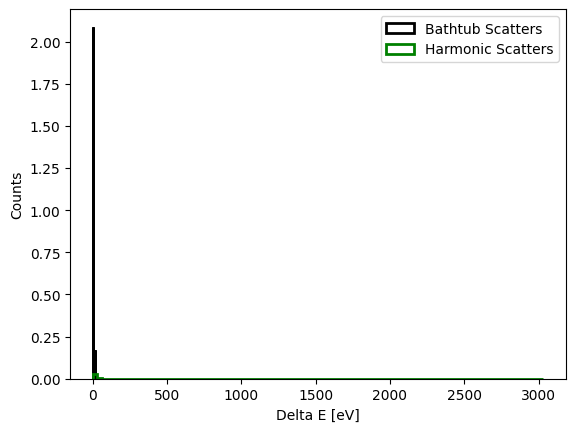

In [115]:
plt.hist(energies_bathtub, bins=100, histtype="step", color="black", linewidth=2, label="Bathtub Scatters", density=True)
plt.hist(energies, bins=100, histtype="step", color="green", linewidth=2, label="Harmonic Scatters", density=True)
plt.xlabel("Delta E [eV]")
plt.ylabel("Counts")
plt.legend()
plt.show();

plt.hist(energies_bathtub, 
         bins=100, range=(0, 15), histtype="step", 
         color="black", linewidth=2, label="Bathtub Scatters",
         density=True)
plt.hist(energies,
         bins=100, histtype="step",
         color="green", linewidth=2, label="Harmonic Scatters",
         density=True)
plt.xlabel("Delta E [eV]")
plt.ylabel("Counts");
# plt.fill_betweenx([0, 400], 0, 2, color="red", alpha=0.3, label='Region of Near-Elastic Scatters')
# plt.fill_betweenx([0, 400], 13.6, 15, color="blue", alpha=0.3, label='Region above Ionisation of Atomic Hydrogen (13.6 eV)')
plt.legend()

plt.show();

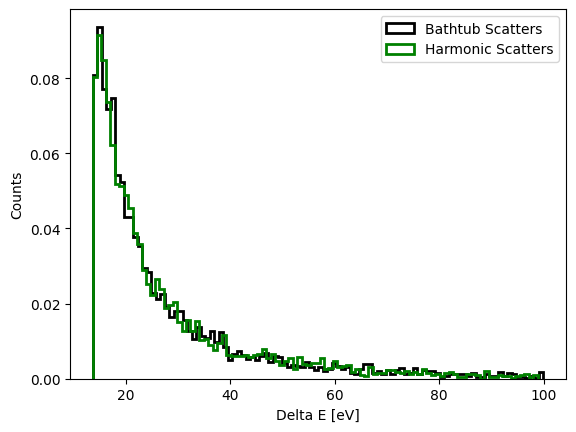

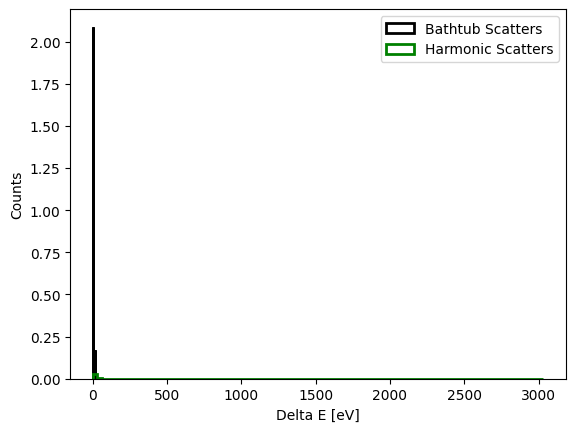

In [132]:
E_min = 3
E_max = 100

upper = np.where(energies_bathtub > E_min)
lower = np.where(energies_bathtub < E_max)
indices = np.intersect1d(upper,lower)

upper = np.where(energies > E_min)
lower = np.where(energies < E_max)
indices_1 = np.intersect1d(upper,lower)

upper = np.where(energies_shallow > E_min)
lower = np.where(energies_shallow < E_max)
indices_shallow = np.intersect1d(upper,lower)


plt.hist(energies_bathtub[indices], bins=100, histtype="step", color="black", linewidth=2, label="Bathtub Scatters", density=True)
plt.hist(energies[indices_1], bins=100, histtype="step", color="green", linewidth=2, label="Harmonic Scatters", density=True)
plt.xlabel("Delta E [eV]")
plt.ylabel("Counts")
plt.legend()
plt.show();

plt.hist(energies_bathtub, 
         bins=100, range=(0, 15), histtype="step", 
         color="black", linewidth=2, label="Bathtub Scatters",
         density=True)
plt.hist(energies,
         bins=100, histtype="step",
         color="green", linewidth=2, label="Harmonic Scatters",
         density=True)
plt.xlabel("Delta E [eV]")
plt.ylabel("Counts");
# plt.fill_betweenx([0, 400], 0, 2, color="red", alpha=0.3, label='Region of Near-Elastic Scatters')
# plt.fill_betweenx([0, 400], 13.6, 15, color="blue", alpha=0.3, label='Region above Ionisation of Atomic Hydrogen (13.6 eV)')
plt.legend()

plt.show();

In [134]:
frame = pd.read_csv("../data/simulations_truth/shallowtrap_scatters.csv")

frame.head()

energies_shallow = []
total_interactions = 0
interaction_times = []
total_times = []

for i in range(len(frame)-1):
    if frame["File_name"][i] == frame["File_name"][i+1]:
        energies_shallow.append(frame["Energy [eV]"][i] - frame["Energy [eV]"][i+1])
        total_interactions += 1
        interaction_times.append(frame["Time [seconds]"][i+1] - frame["Time [seconds]"][i])
    
    else:
        total_times.append(frame["Time [seconds]"][i])

energies_shallow = np.array(energies_shallow)

print("Median energy loss per interaction: ", np.median(energies), "eV")
print("Mean energy loss per interaction: ", np.mean(energies), "eV")
print("Minimum energy loss: ", np.min(energies), "eV")
print("Maximum energy loss: ", np.max(energies), "eV")
print("Total interactions: ", total_interactions)
print("Average number of interactions: ", total_interactions/frame["File_name"].nunique())


print("Timing information")
print("Average event time: ", np.mean(total_times), "seconds")
print("Median event time: ", np.median(total_times), "seconds")
print("Average interaction time: ", np.mean(interaction_times), "seconds")
print("Median interaction time: ", np.median(interaction_times), "seconds")


Median energy loss per interaction:  17.222022596239185 eV
Mean energy loss per interaction:  23.326510656733944 eV
Minimum energy loss:  0.0034800643734342884 eV
Maximum energy loss:  3032.6311099906634 eV
Total interactions:  1099
Average number of interactions:  1.3929024081115335
Timing information
Average event time:  0.0002476292795872747 seconds
Median event time:  0.0001929570702973 seconds
Average interaction time:  0.00017833158967531037 seconds
Median interaction time:  0.0001343778151866 seconds


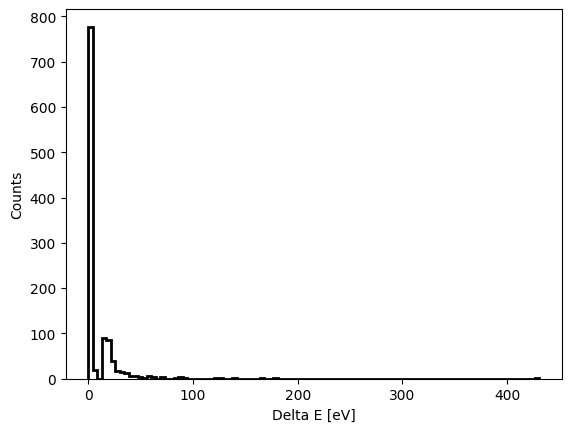

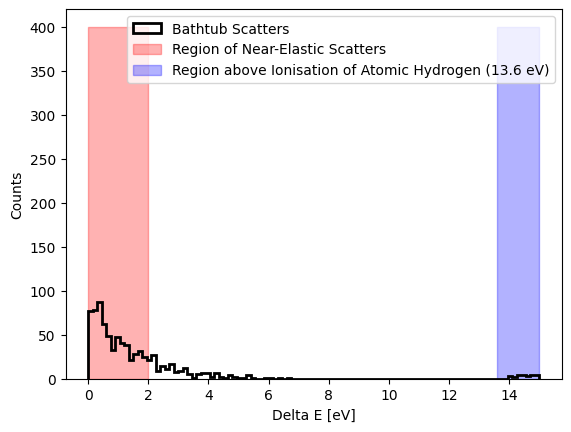

In [135]:
plt.hist(energies_shallow, bins=100, histtype="step", color="black", linewidth=2, label="Bathtub Scatters")
plt.xlabel("Delta E [eV]")
plt.ylabel("Counts");
plt.show();

plt.hist(energies_shallow, bins=100, range=(0, 15), histtype="step", color="black", linewidth=2, label="Bathtub Scatters")
plt.xlabel("Delta E [eV]")
plt.ylabel("Counts");
plt.fill_betweenx([0, 400], 0, 2, color="red", alpha=0.3, label='Region of Near-Elastic Scatters')
plt.fill_betweenx([0, 400], 13.6, 15, color="blue", alpha=0.3, label='Region above Ionisation of Atomic Hydrogen (13.6 eV)')
plt.legend()

plt.show();

(array([436., 263., 178.,  86.,  69.,  28.,  22.,   7.,   6.,   4.]),
 array([1.08271395e-06, 9.55712670e-05, 1.90059820e-04, 2.84548373e-04,
        3.79036926e-04, 4.73525479e-04, 5.68014033e-04, 6.62502586e-04,
        7.56991139e-04, 8.51479692e-04, 9.45968245e-04]),
 <BarContainer object of 10 artists>)

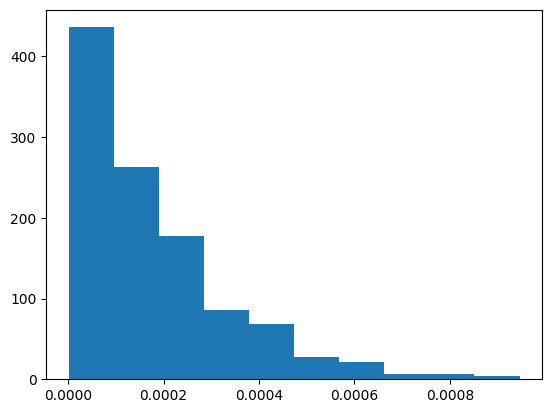

In [136]:
plt.hist(interaction_times)

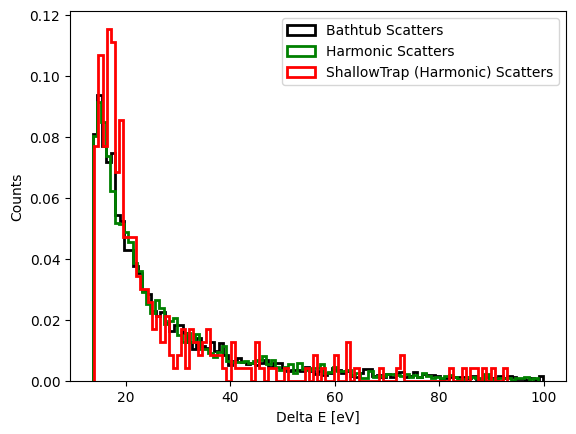

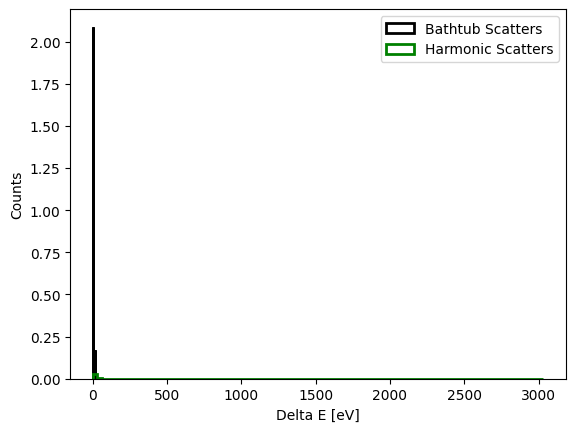

In [142]:
E_min = 8
E_max = 100

upper = np.where(energies_bathtub > E_min)
lower = np.where(energies_bathtub < E_max)
indices = np.intersect1d(upper,lower)

upper = np.where(energies > E_min)
lower = np.where(energies < E_max)
indices_1 = np.intersect1d(upper,lower)

upper = np.where(energies_shallow > E_min)
lower = np.where(energies_shallow < E_max)
indices_shallow = np.intersect1d(upper,lower)


plt.hist(energies_bathtub[indices], bins=100, histtype="step", color="black", linewidth=2, label="Bathtub Scatters", density=True)
plt.hist(energies[indices_1], bins=100, histtype="step", color="green", linewidth=2, label="Harmonic Scatters", density=True)
plt.hist(energies_shallow[indices_shallow], bins=100, histtype="step", color="red", linewidth=2, label="ShallowTrap (Harmonic) Scatters", density=True)

plt.xlabel("Delta E [eV]")
plt.ylabel("Counts")
plt.legend()
plt.show();

plt.hist(energies_bathtub, 
         bins=100, range=(0, 15), histtype="step", 
         color="black", linewidth=2, label="Bathtub Scatters",
         density=True)
plt.hist(energies,
         bins=100, histtype="step",
         color="green", linewidth=2, label="Harmonic Scatters",
         density=True)
plt.xlabel("Delta E [eV]")
plt.ylabel("Counts");
# plt.fill_betweenx([0, 400], 0, 2, color="red", alpha=0.3, label='Region of Near-Elastic Scatters')
# plt.fill_betweenx([0, 400], 13.6, 15, color="blue", alpha=0.3, label='Region above Ionisation of Atomic Hydrogen (13.6 eV)')
plt.legend()

plt.show();

Need to think about two things for this analysis. 

Both the total number of interactions for the specific gas density. Can we use the analytical cross sections as a prior to confirm our simulations? Does this even make sense to do. How else will we confirm.

For mixtures of Helium and Hydrogen we need to be able to resolve the curves/their shapes to be able to make any kind of statement about their fractional ratio. 

Their cross sections are well resolved for a range of 0-20keV, while we will be probing the upper end of that spectrum, being able to do so for lower energies may allow us more confidence in our analysis. 


Questions?

- Will there be any other probing in the system, or will the only kind of readout be waveguide/antennae. Is there anything else or any other physics that is encoded within the data. 